In [1]:
import os
import numpy as np
import glob

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout, Input
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
base_dir = '/Users/hangi/data/project'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')
test_dir = os.path.join(base_dir,'test')

In [3]:
a = np.load('/Users/hangi/data/project/train/swir_data1.npy')
b = np.load('/Users/hangi/data/project/train/swir_data2.npy')

In [4]:
aa = np.array([[1, 2], [3, 4]])
bb = np.array([[5, 6]])
np.concatenate((aa, bb), axis=0).shape

(3, 2)

In [5]:
bb.shape

(1, 2)

In [6]:
#데이터 병합
c = np.stack([a, b], axis=0)
d = np.stack([a, b], axis=1)

In [7]:
a.shape

(61, 61, 275)

In [8]:
#에러(차원수가 다르다. a= dim(3) b= dim(4))
#f = np.concatenate([e,f],axis=0)

In [9]:
e = a.reshape(1,61,61,275)

In [10]:
from PIL import Image
import numpy as np

In [11]:
img2 = Image.fromarray(np.uint8(a[:,:,100] * 255) , 'L')

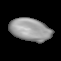

In [12]:
img2

In [5]:
npy = np.zeros(shape=(1,61,61,275,1))
for f in glob.glob("/Users/hangi/data/project/train/swir_data1.npy"):
    with open(f,"rb") as infile:
        npy = np.load(infile).reshape(1,61,61,275,1)
    

In [6]:
npy

array([[[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],


In [13]:
a[:,:,1].shape

(61, 61)

In [14]:
e.shape

(1, 61, 61, 275)

In [50]:
npy1 = np.zeros(shape=(1,61,61,275,1))
for f in glob.glob("/Users/hangi/data/project/train/*.npy"):
    with open(f, "rb") as infile:
            npy = np.load(infile).reshape(1,61,61,275,1)
            npy2 = np.concatenate([npy,npy1],axis=0)
            npy1 = npy2

In [60]:
#이미지 변환
img1 = Image.fromarray(np.uint8(npy2[9][:,:,1,0] * 255) , 'L')

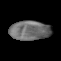

In [61]:
img1

In [58]:
npy2[1][:,:,1,0].shape

(61, 61)

In [62]:
npy3 = np.delete(npy2,10,0)

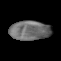

In [65]:
img2 = Image.fromarray(np.uint8(npy3[9][:,:,1,0] * 255) , 'L')
img2

In [66]:
npy3.shape

(10, 61, 61, 275, 1)

In [67]:
train_x = npy3

In [68]:
test1 = np.zeros(shape=(1,61,61,275,1))
for f in glob.glob("/Users/hangi/data/project/test/*.npy"):
    with open(f, "rb") as infile:
            test = np.load(infile).reshape(1,61,61,275,1)
            test2 = np.concatenate([test,test1],axis=0)
            test1 = test2

In [69]:
test_x = np.delete(test2,5,0)

In [70]:
test_x.shape

(5, 61, 61, 275, 1)

In [71]:
import pandas as pd

label_df = pd.read_csv("/Users/hangi/data/swir_1/germination_label.csv")
label_df.head(5)

,0
0,0
1,0
2,1
3,0
4,0


In [72]:
train_y = label_df[0:10]
train_y

,0
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [80]:
from keras.utils import to_categorical
train_y = to_categorical(train_y)

In [73]:
test_y = label_df[16:21]
test_y

,0
16,1
17,1
18,0
19,0
20,0


In [81]:
test_y = to_categorical(test_y)

In [82]:
test_y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [89]:
input_layer = Input((61, 61, 275,1))

conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 7), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 5), activation='relu')(conv_layer1)
conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(conv_layer2)
print(conv_layer3._keras_shape)
conv3d_shape = conv_layer3._keras_shape
conv_layer3 = Reshape((conv3d_shape[1], conv3d_shape[2], conv3d_shape[3]*conv3d_shape[4]))(conv_layer3)
conv_layer4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(conv_layer3)

flatten_layer = Flatten()(conv_layer4)

dense_layer1 = Dense(units=256, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=128, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=1, activation='softmax')(dense_layer2)

(None, 55, 55, 263, 32)


In [90]:
model = Model(inputs=input_layer, outputs=output_layer)

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 61, 61, 275, 1)    0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 59, 59, 269, 8)    512       
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 57, 57, 265, 16)   5776      
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 55, 55, 263, 32)   13856     
_________________________________________________________________
reshape_5 (Reshape)          (None, 55, 55, 8416)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 64)        4847680   
_________________________________________________________________
flatten_5 (Flatten)          (None, 179776)            0         
__________

In [92]:
adam = Adam(lr=0.001, decay=1e-06)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [93]:
filepath = "best-model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [94]:
history = model.fit(x=train_x, y=train_y, batch_size=256, epochs=100, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10/10 [==============================] - 63s 6s/step - loss: 0.7052 - acc: 0.2000

Epoch 00001: acc improved from -inf to 0.20000, saving model to best-model.hdf5
Epoch 2/100


KeyboardInterrupt: 

In [ ]:
# load best weights
model.load_weights("best-model.hdf5")
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
Xtest = Xtest.reshape(-1, windowSize, windowSize, K, 1)
Xtest.shape

In [ ]:
ytest = np_utils.to_categorical(ytest)
ytest.shape

In [ ]:
Y_pred_test = model.predict(Xtest)
y_pred_test = np.argmax(Y_pred_test, axis=1)

classification = classification_report(np.argmax(ytest, axis=1), y_pred_test)
print(classification)